# Quantum Well 
The programme is based on the simulation of the behaviour of a quantum particle by numerical solution of the time-dependent Schroedinger equation.
<br />We consider an electron enclosed in a one-dimensional box. It is subjected to a uniform electric field with amplitude oscillating in time. Any relativistic effects, in particular the spin of the electron, will be neglected. In the course of the simulation we will observe the evolution of the wave function of the electron and the absorption or release of energy by the electron due to interaction with an external electric field.



In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
K = 1
N = 100
dx = 1 / N
x = np.zeros(N+1)
PsiRe = np.zeros(N+1)
PsiIm = np.zeros(N+1)
PsiRe_temp = np.zeros(N+1)
HRe = np.zeros(N+1)
HIm = np.zeros(N+1)
ro=np.zeros(N+1)
epsilon_tab=[]
norm_tab=[]
x_tab=[]

ni = 0
x_sr = 0
epsilon = 0
sumaTemp = 0
omega = 0
n = 1

# Inputs to simulation


In [ ]:
tau = 0
dTau = 0.0001
S0 = 500000
Sout = 1000

# Frequency of the electric field
omega = 3/2*np.pi*np.pi 

## Opening files 

In [ ]:
file_epsilon = open(f"Dane_Energia_K{K}_omega0.txt", "w")
file_ro = open("Dane_Ro_K0_omega0.txt","w")

## Functions to calculate new Hamiltonians - Real and Imaginary 

In [ ]:
def H_Re(k, tau, PsiRe, x, omega):
    return -0.5 *(PsiRe[k+1]+PsiRe[k-1]-2*PsiRe[k])/dx**2 + K*(x[k]-0.5)*PsiRe[k]*math.sin(omega*tau);

def H_Im(k, tau, PsiIm, x, omega):
    return -0.5 *(PsiIm[k+1]+PsiIm[k-1]-2*PsiIm[k])/dx**2+K*(x[k]-0.5)*PsiIm[k]*math.sin(omega*tau);

## Setting initial conditions

In [ ]:
for k in range (N+1):
    x[k] = dx * k
    PsiRe[k] = math.sqrt(2) * math.sin(np.pi * x[k] * n)
    PsiIm[k] = 0

HRe[0] = HRe[N] = 0
HIm[0] = HIm[N] = 0

for k in range(N):
    HRe[k] = H_Re(k, tau, PsiRe, x, omega)
    HIm[k] = H_Im(k, tau, PsiIm, x, omega)
HRe[0] = HRe[N] = 0
HIm[0] = HIm[N] = 0


# Starting simulation

In [ ]:
for s in range (S0):

    for k in range (N+1):
        PsiRe_temp[k] = PsiRe[k] + HIm[k] * dTau/2

# Caltulating New Real Hamiltonian 
    for k in range(N):
        HRe[k] = H_Re(k,(tau + dTau /2), PsiRe_temp, x,omega)
    HRe[0] = HRe[N] = 0
# Calculating New Imaginary Hamiltonian 
    for k in range(N+1):
        PsiIm[k] = PsiIm[k] - HRe[k]*dTau
    for k in range (N):
        HIm[k] = H_Im(k,(tau + dTau), PsiIm, x,omega)
    HIm[0] = HIm[N] = 0

    for k in range(N+1):
        PsiRe[k] = PsiRe_temp[k] + HIm[k]*dTau/2

    for k in range (N+1):
        ro[k] = PsiRe[k]**2 + PsiIm[k]**2
        file_ro.write(str(ro[k]))
        file_ro.write("\n")
        
# Records every 1000 position 
    if (s % Sout == 0):
        for i in range(N+1):
            sumaTemp += PsiRe[i]**2 + PsiIm[i]**2
        ni = dx * sumaTemp
        norm_tab.append(ni)
        sumaTemp = 0

        for i in range(N+1):
            sumaTemp += x[i] * (PsiRe[i]**2 + PsiIm[i]**2)
        x_sr = dx * sumaTemp
        x_tab.append(x_sr)
        sumaTemp = 0

        for i in range(N+1):
            sumaTemp += HRe[i] * PsiRe[i] + HIm[i]*PsiIm[i]
        epsilon = dx * sumaTemp
        epsilon_tab.append(epsilon)
        file_epsilon.write(str(epsilon))
        file_epsilon.write("\n")
        sumaTemp = 0
    tau += dTau
file_epsilon.close()
file_ro.close()

Text(0.5, 1.0, 'Wave Function Norm')

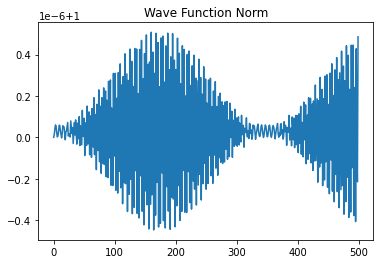

In [ ]:
plt.plot(norm_tab)
plt.title("Wave Function Norm")

Text(0.5, 1.0, 'Average positon')

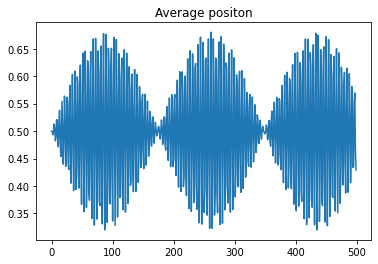

In [ ]:
plt.plot(x_tab)
plt.title("Average positon")

Text(0.5, 1.0, 'Average energy')

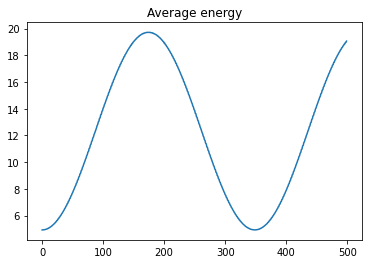

In [ ]:
plt.plot(epsilon_tab)
plt.title("Average energy")

# Fitting Relativistic Breit–Wigner distribution

In [ ]:
from scipy import optimize

**Emax** is the maximum energy corresponding to a percentage of the resonance frequency.
The resonance frequency is equal to $\omega$ = $3/2 $$\Pi$$^2$ 


In [ ]:
Omega = [0.8, 0.9, 0.95, 1, 1.05, 1.1, 1.2]  # Percentage of resonanse frequency
Emax = [4.977312791, 5.117103564, 5.732834299, 19.72316709, 5.814148543, 5.187579447, 4.98225486]

In [ ]:
def BW_fit(x, gamma):
  return (1/2*np.pi * gamma/(((x-1)**2) + (gamma**2)/4 ))

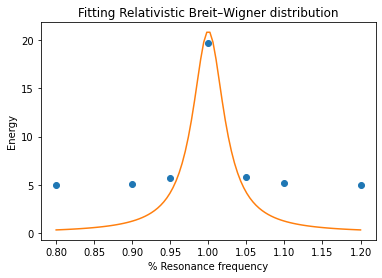

In [ ]:
x = np.linspace(0.8, 1.2, 100)
BW = []

params, params_covariance = optimize.curve_fit(BW_fit,Omega,Emax)

fig = plt.figure()
plt.plot(Omega,Emax,'o')
for i in range(len(x)):
    BW.append(1/6*BW_fit(x[i],0.05))
plt.plot(x,BW)
plt.title("Fitting Relativistic Breit–Wigner distribution")
plt.xlabel("% Resonance frequency")
plt.ylabel("Energy")
plt.show()